In [1]:
from math import sqrt

def mean(values):
    return sum(values)/ len(values)

def variance(values, mean):
    return sum((i - mean)**2 for i in values) / len(values)

def covariance(xs , mean_x, ys, mean_y):
    return sum((xs[i] - mean_x)*(ys[i] - mean_y) for i in range (len(xs))) / len(xs)

def coefficients(dataset):
    X = [i[0] for i in dataset]
    Y = [i[1] for i in dataset]

    mean_x = mean(X)
    mean_y = mean(Y)

    b1 = covariance(X, mean_x, Y, mean_y) / variance(X, mean_x)
    b0 = mean_y - b1 * mean_x

    return b0 , b1

def predict_row(x_value, b0,b1):
    return b0 - b1 * x_value

def simple_linear_regression(train_data, test_data):
    b0 , b1 = coefficients(train_data)
    return [predict_row(i[0], b0, b1) for i in test_data]

def rmse_calc(predicted, actual):
    return sqrt(sum([(actual[i] - predicted[i])**2 for i  in range (len(actual))]) / len(actual))

def evaluate_algorithm(dataset):
    test_data = [[x[0],None] for x in dataset]
    predicted = simple_linear_regression(dataset, test_data)
    actual = [x[1] for x in dataset]

    return rmse_calc(predicted, actual)

dataset = [
    [1, 1],
    [2, 3],
    [4, 3],
    [3, 2],
    [5, 5]
]

b0 , b1 = coefficients(dataset)
print("RMSE= ", evaluate_algorithm(dataset))
print("b0 = ",b0 ,"\nb1 = ", b1)

RMSE=  5.351635264103861
b0 =  0.39999999999999947 
b1 =  0.8


In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/home/dikshith/Documents/SEM V LAB CODES/AIML/datasets/p2.csv')
attributes = np.array(dataset)[:,:-1]
target = np.array(dataset)[:,-1]

print(attributes,'\n')
print(target)

def hypothesis(attributes, target):
    specific_h =  None
    for i ,value in enumerate(target):
        if value == "Yes":
            specific_h = attributes[i].copy()
            break
    
    for i, value in enumerate(target):
        if value == "Yes":
            for j in range(len(specific_h)):
                if attributes[i][j] != specific_h[j]:
                    specific_h[j] = '?'
    return specific_h

print("Find S algorithm: ",hypothesis(attributes, target))

[['Morning' 'Sunny' 'Warm' 'Yes' 'Mild' 'Strong']
 ['Evening' 'Rainy' 'Cold' 'No' 'Mild' 'Normal']
 ['Morning' 'Sunny' 'Moderate' 'Yes' 'Normal' 'Normal']
 ['Evening' 'Sunny' 'Cold' 'Yes' 'High' 'Strong']] 

['Yes' 'No' 'Yes' 'Yes']
Find S algorithm:  ['?' 'Sunny' '?' 'Yes' '?' '?']


In [25]:
import numpy as np
import pandas as pd

data = pd.read_csv('/home/dikshith/Documents/SEM V LAB CODES/AIML/datasets/p3.csv')
concepts = np.array(data)[:, :-1]
target = np.array(data)[:, -1]

def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]

    for i, instance in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if instance[x] != specific_h[x]:
                    specific_h[x] = "?"
                    general_h[x][x] = "?"
        else:
            for x in range(len(specific_h)):
                if instance[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = "?"

        print("Updated Specific Hypothesis:", specific_h)
        print("Updated General Hypothesis:", general_h)

    general_h = [g for g in general_h if g != ["?"] * len(specific_h)]

    return specific_h, general_h


print(learn(concepts, target))


Updated Specific Hypothesis: ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Updated General Hypothesis: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Updated Specific Hypothesis: ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
Updated General Hypothesis: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Updated Specific Hypothesis: ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
Updated General Hypothesis: [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'Same']]
Updated Specific Hypothesis: ['Sunny' 'Warm' '?' 'Strong' '?' '?']
Updated General Hypothesis: [['Sunny

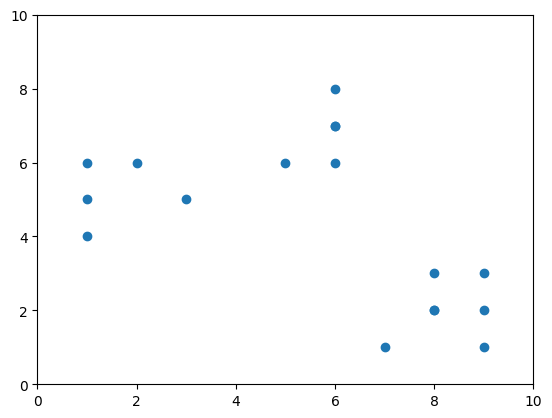

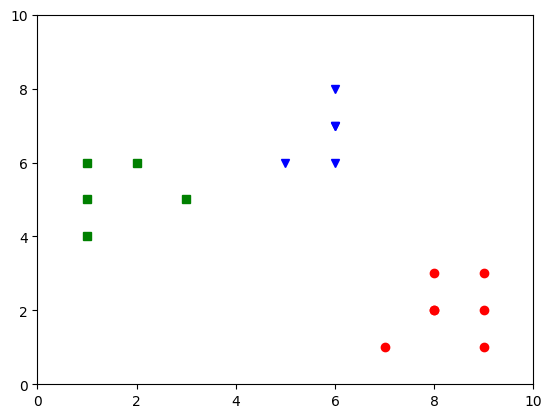

In [29]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 6, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.xlim([0,10])
plt.ylim([0,10])
plt.scatter(x1,x2)
plt.show()

X = np.array(list(zip(x1,x2))).reshape(len(x1),2)
colors = ['r','g','b']
markers = ['o','s','v']

K = 3
kmeans = KMeans(K).fit(X)
plt.plot()
for i, l in enumerate(kmeans.labels_):
    plt.plot(x1[i],x2[i], color=colors[l], marker=markers[l])

plt.xlim([0,10])
plt.ylim([0,10])
plt.show()